In [2]:
import pandas as pd
import pywt
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('acc_00001.csv',header=None)

In [4]:
data

,0,1,2,3,4,5
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020
...,...,...,...,...,...,...
2555,9,39,39,165470.0,0.044,-0.094
2556,9,39,39,165510.0,-0.456,0.486
2557,9,39,39,165550.0,-0.885,-0.154
2558,9,39,39,165580.0,-0.230,-0.762


In [5]:
h = data[4].to_numpy()
v = data[5].to_numpy()

In [6]:
x = np.sqrt(h**2 + v**2)
x.shape

(2560,)

Text(0, 0.5, 'Acceleration')

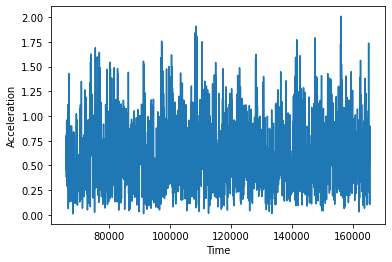

In [7]:
plt.plot(data[3].to_numpy(), x)
plt.xlabel('Time')
plt.ylabel('Acceleration')

In [8]:
wp = pywt.WaveletPacket(data=x, wavelet='db1', mode='symmetric')

In [9]:
wp.maxlevel

11

In [10]:
terminal_nodes = wp.get_leaf_nodes(True)
terminal_nodes[5].data

array([-0.77587981,  0.        ])

In [11]:
Edn = np.array([terminal_node.data[0]**2 + terminal_node.data[1]**2 for terminal_node in terminal_nodes])
print(Edn.size)

2048


In [12]:
Et = 0
for E in Edn:
    Et = Et + E

In [13]:
Pdn = []
for i in range(len(Edn)):
    Pdn.append([terminal_nodes[i].data[0] ** 2 / Edn[i] , terminal_nodes[i].data[1] ** 2 / Edn[i] ])
Pdn = np.array(Pdn)

In [14]:
print(wp.get_leaf_nodes()[5].data)

[-0.77587981  0.        ]


In [15]:
Pt = np.array([ E/Et for E in Edn])

In [16]:
def renyi_entropy(P,alpha):
    entropy = 1/(1-alpha) * np.log(np.sum(P**alpha))
    return entropy

In [17]:
def divergence(P,Q,w,alpha):
    d = renyi_entropy(((w*P)+(1-w)*Q) , alpha) - (w*renyi_entropy(P,alpha) + (1-w)*renyi_entropy(Q,alpha))
    return d

In [18]:
def stat_complexity(Q0,P,P0,w,alpha):
    sc = Q0 * divergence(P,P0,w,alpha) * renyi_entropy(P,alpha)
    return sc

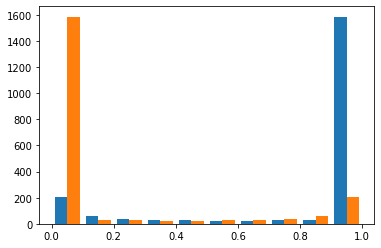

In [19]:
plt.hist(Pdn)
plt.show()

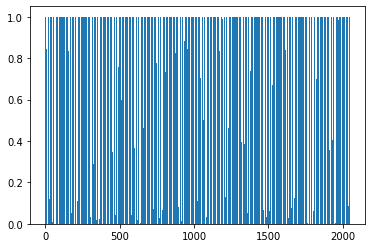

In [57]:
pdn_x = [i for i in range(2048)]
# print(Pdn[:, 0])
# print(Pdn[:, 0].shape)
# print(len(pdn_x))
plt.bar(pdn_x, Pdn[:, 0])
plt.show()


In [20]:
print(Pt)

[7.77332458e-01 5.58416616e-05 1.12415364e-04 ... 1.00214748e-06
 1.22842691e-04 1.14253872e-04]


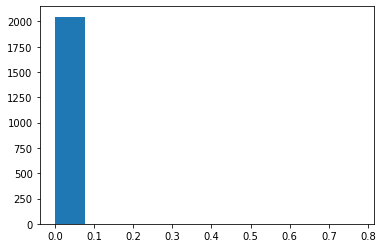

In [23]:
plt.hist(Pt)
plt.show()